In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [77]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [15]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [79]:
df.shape

(180, 9)

In [80]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [20]:
# Dropping Duplicates if any
df=df.drop_duplicates()
df.shape

(180, 9)

### Inference
1. No Duplicate records found.

### Missing Data Analysis

In [21]:
def missingValue(df):
    #Identifying Missing data. Already verified above. To be sure again checking.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    print("Total records = ", df.shape[0])

    md = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return md
missingValue(df).head(5)

Total records =  180


,Total Missing,In Percent
Product,0,0.0
Age,0,0.0
Gender,0,0.0
Education,0,0.0
MaritalStatus,0,0.0


### Inference
No missing value found.

### Unique values (counts) for each Feature

In [22]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

### Unique values (names) are checked for each Features

In [26]:
for x in df.columns:
    print("column name",x)
    print("unique values are",df[x].unique())

column name Product
unique values are ['KP281' 'KP481' 'KP781']
column name Age
unique values are [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
column name Gender
unique values are ['Male' 'Female']
column name Education
unique values are [14 15 12 13 16 18 20 21]
column name MaritalStatus
unique values are ['Single' 'Partnered']
column name Usage
unique values are [3 2 4 5 6 7]
column name Fitness
unique values are [4 3 2 1 5]
column name Income
unique values are [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
column name Miles
unique values are 

### Inference
No abnormalities were found in the data.

### DataType Validation

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 14.1+ KB


### Inference
1.Product, Gender and MaritalStatus are categorial variables. Hence updating the dtype for same.

In [28]:
df['Gender'] = df['Gender'].astype("category")
df['Product'] = df['Product'].astype("category")
df['MaritalStatus'] = df['MaritalStatus'].astype("category")

### Analyzing basic statistics about each feature, such as count, min, max, and mean

In [30]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Inferences
Huge difference in income for customers who purchase treadmills. Ranging between USD 29562 to 104581.

### Data Preparation,segementation and categorization
1. Dervied Columns
2. Added 2 new feature from Age
3. "AgeCategory" - Teens, 20s, 30s and Above 40s
4. "AgeGroup" - 14-20 , 20-30, 30-40 & 40-60
5. Added 1 new categorial feature based on the income
6. "IncomeSlab" - Low Income, Lower-middle income,Upper-Middle income and High income

In [32]:
bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
df['AgeGroup'] = pd.cut(df['Age'], bins)
df['AgeCategory'] = pd.cut(df['Age'], bins,labels=labels)
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### Income Slab

In [34]:
bins_income = [29000, 35000, 60000, 85000,105000]
labels_income = ['Low Income','Lower-middle income','Upper-Middle income', 'High income']
df['IncomeSlab'] = pd.cut(df['Income'],bins_income,labels = labels_income)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory,IncomeSlab
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens,Lower-middle income


### Univariante Analysis
1. Numerical Variables
2. Outlier Detection
3. Categorial variables
4. Product
5. Gender
6. MaritalStatus
7. AgeGroup
8. AgeCategory
9. IncomeSlab

### Numerical Variables - Outlier detection¶
1. Income
2. Miles

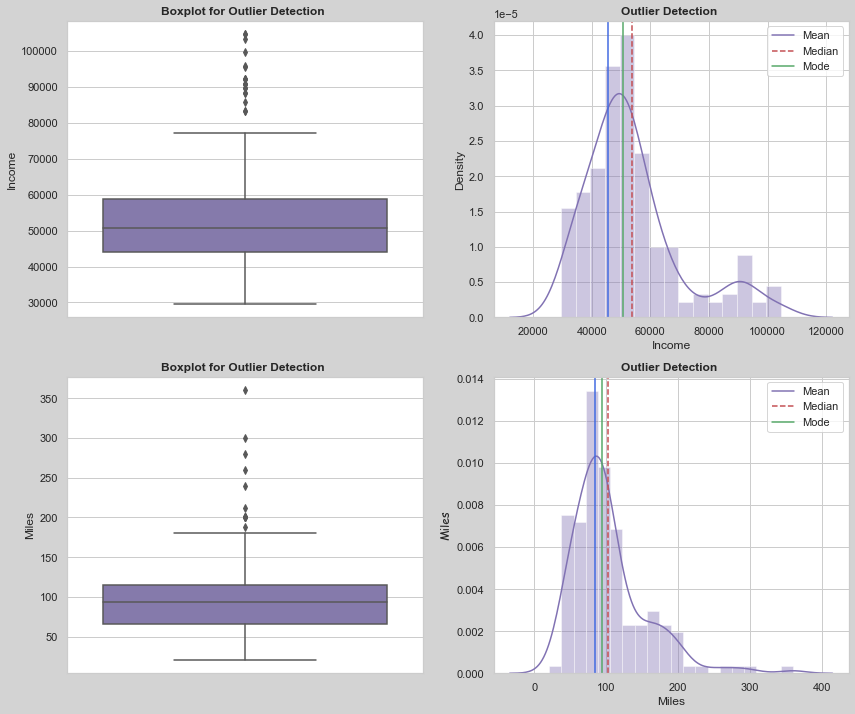

In [36]:
### Function for Outlier detection¶
#Box plot - for checking range of outliers
#distplot - For checking skewness
def outlier_detect(df,colname,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12,family = "Comic Sans MS")
        sns.boxplot(y = df[var],color='m',ax=ax[rows][0])
        
        # plt.subplot(nrows,mcols,pltcounter+1)
        sns.distplot(df[var],color='m',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='g', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

col_num = [ 'Income', 'Miles']
outlier_detect(df,col_num,2,2,14,12)

### Inference
1. Both Miles and Income have significant outliers based on the above boxblot.
2. Also both are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of thefigure.
3. Majority of Customers fall within the USD 45,000 - USD 60,000 range
4. There are outliers over USD 85,000
5. Only a few of our customers run more than 180 miles per week

###  Handling outliers

In [37]:
df_v1 = df.copy()

### Removing outliers for Income Feature

In [38]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = df_v1['Income'].quantile(0.75)
Q1 = df_v1['Income'].quantile(0.25)
IQR = Q3-Q1
df_v1 = df_v1[(df_v1['Income'] > Q1 - 1.5*IQR) & (df_v1['Income'] < Q3 + 1.5*IQR)]
plt.show()

### Removing outliers for the Mile Feature

In [40]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = df_v1['Miles'].quantile(0.75)
Q1 = df_v1['Miles'].quantile(0.25)
IQR = Q3-Q1
df_v1 = df_v1[(df_v1['Miles'] > Q1 - 1.5*IQR) & (df_v1['Miles'] < Q3 + 1.5*IQR)]
plt.show()

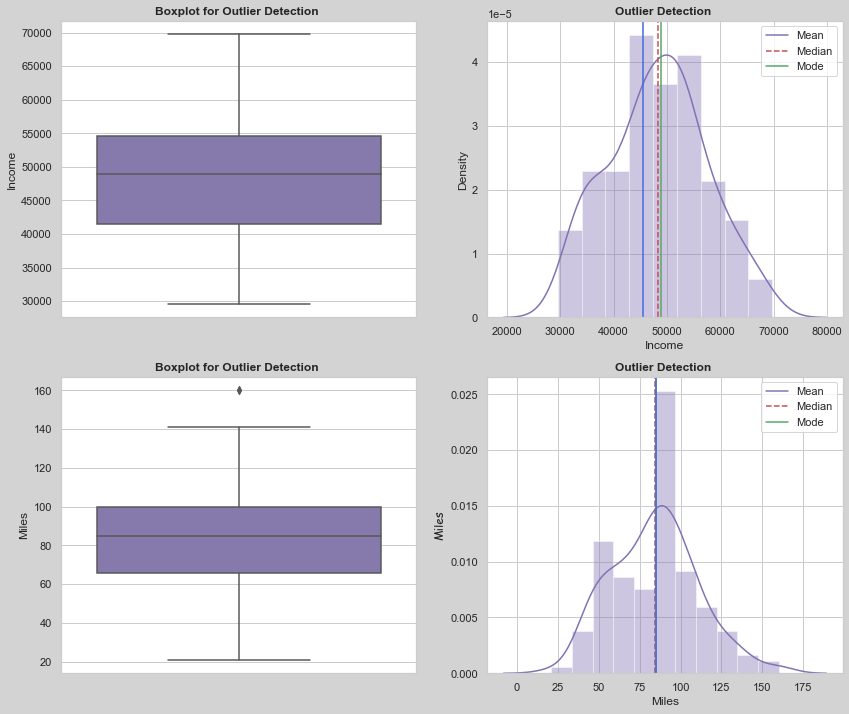

In [41]:
col_num = [ 'Income', 'Miles']
outlier_detect(df_v1,col_num,2,2,14,12)

In [43]:
df_v1.shape

(147, 12)

### Inferences
1. It's true that there are outliers, but they may provide many insights for high-end models that can benefit companies more. 2. Therefore, they should not be removed for further analysis.

### Categorical variable Uni-variante Analysis

In [44]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'AgeGroup', 'AgeCategory', 'IncomeSlab'],
      dtype='object')

### Function for Bi-variante Analysis
1. Used countplot for the analysis

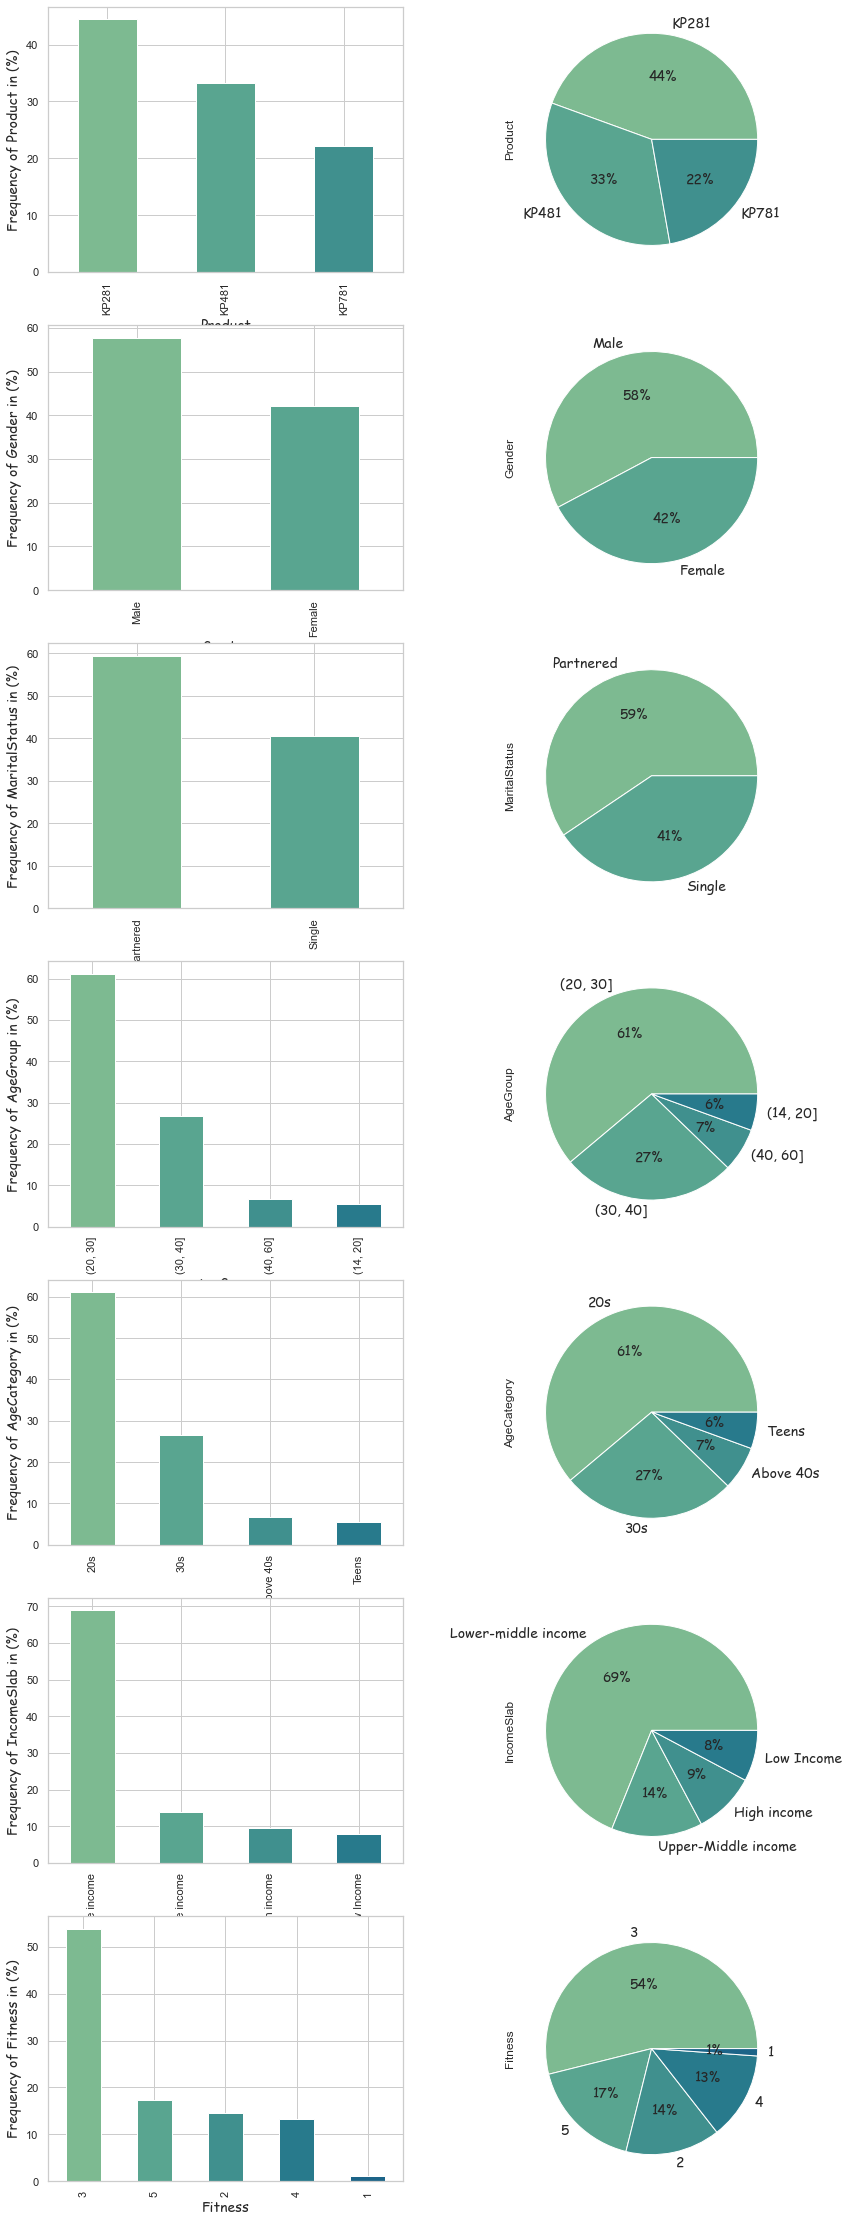

In [45]:

def cat_bi_analysis(df,colname,depend_var,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    rows = 0
    string = " based Distribution"
    for var in colname:
        string = var + string
        sns.countplot(data=df,x=depend_var, hue=var, palette="hls",ax=ax[rows][0])
        sns.countplot(data=df, x=var, hue=depend_var, palette="husl",ax=ax[rows][1])
        ax[rows][0].set_title(string, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_title(string, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_ylabel('count', fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(var,fontweight="bold", fontsize=14,family = "Comic Sans MS")  
        ax[rows][1].set_ylabel('count', fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(var,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
        string = " based Distribution"
    plt.show()

def cat_analysis(df, colnames, nrows=2,mcols=2,width=20,height=30, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))  
    fig.set_facecolor(color = 'white')
    string = "Frequency of "
    rows = 0                          
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("crest"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string, fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(colname, fontsize=14,family = "Comic Sans MS")      
        count.plot.pie(colors = sns.color_palette("crest"),autopct='%0.0f%%',
                       textprops={'fontsize': 14,'family':"Comic Sans MS"},ax=ax[rows][1])        
        string = "Frequency of "
        rows += 1
cat_colnames = ['Product', 'Gender', 'MaritalStatus', 'AgeGroup', 'AgeCategory','IncomeSlab','Fitness']

cat_analysis(df,cat_colnames,7,2,14,40)

### Inferences¶
1. 83% of treadmills are bought by customers with incomes between USD dollars 35000-60000, and USD dollars 60,000-85000.
2. 88% of treadmills are purchased by customers aged 20 to 40.
3. The treadmills are more likely to be purchased by married people
4. Model TM195 is the best-selling product
5. Customer with fitness level 3 buy major chuck of treadmills. (54%)

### Bi-Variant Analysis
1. Categorical variables
2. Gender
3. MaritalStatus
4. AgeGroup
5. AgeCategory
6. IncomeSlab

In [46]:
## Bivariant analysis for Categorical variables

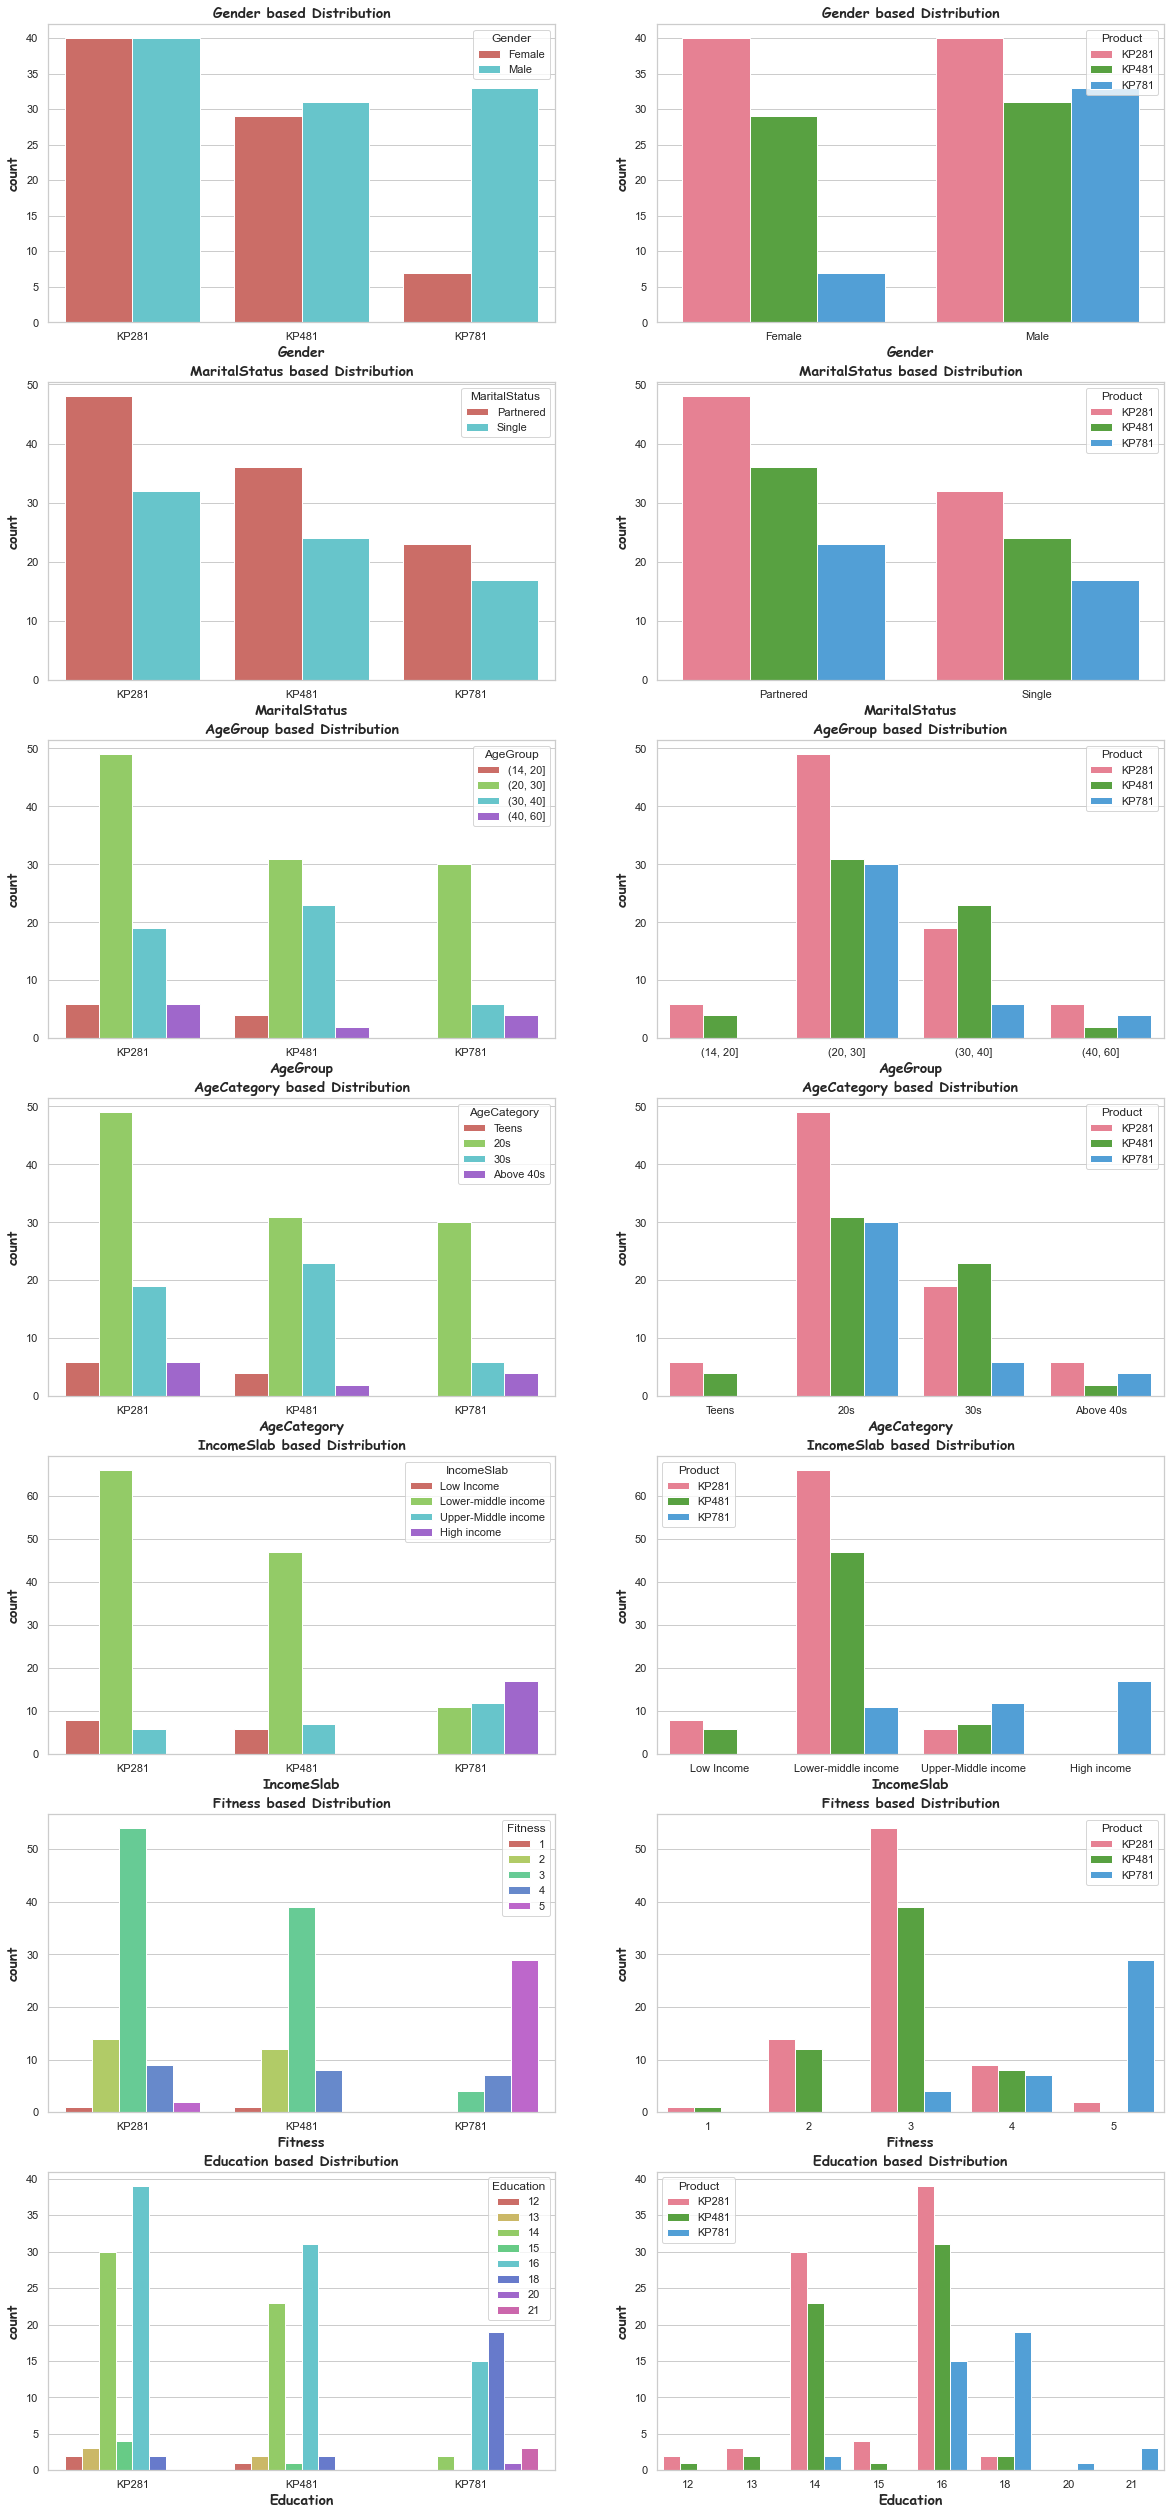

In [48]:
def cat_bi_analysis(df,colname,depend_var,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    rows = 0
    string = " based Distribution"
    for var in colname:
        string = var + string
        sns.countplot(data=df,x=depend_var, hue=var, palette="hls",ax=ax[rows][0])
        sns.countplot(data=df, x=var, hue=depend_var, palette="husl",ax=ax[rows][1])
        ax[rows][0].set_title(string, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_title(string, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_ylabel('count', fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(var,fontweight="bold", fontsize=14,family = "Comic Sans MS")  
        ax[rows][1].set_ylabel('count', fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(var,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
        string = " based Distribution"
    plt.show()
col_names = ['Gender', 'MaritalStatus', 'AgeGroup', 'AgeCategory','IncomeSlab','Fitness','Education']
cat_bi_analysis(df,col_names,'Product',7,2,20,45)

### Inferences
#### Gender
1. TM798 model is the most popular among males
2. TM195 is equally preferred by men and women
#### AgeCategory
3. The most useful treadmills product for people over 40s is the TM195 & TM798.However, they buy fewer treadmills.
#### Income
4. Customer with high income only buy high end model. (TM798)
#### Fitness Level
5. Customers with 5 fitness level prefer using TM798.(High end Model)
6. With moderate fitness level , customer prefer using TM195.
#### Education

7. Customer above 20 years education, purchase only TM798 model.
8. The other categorical features show no specific trends.

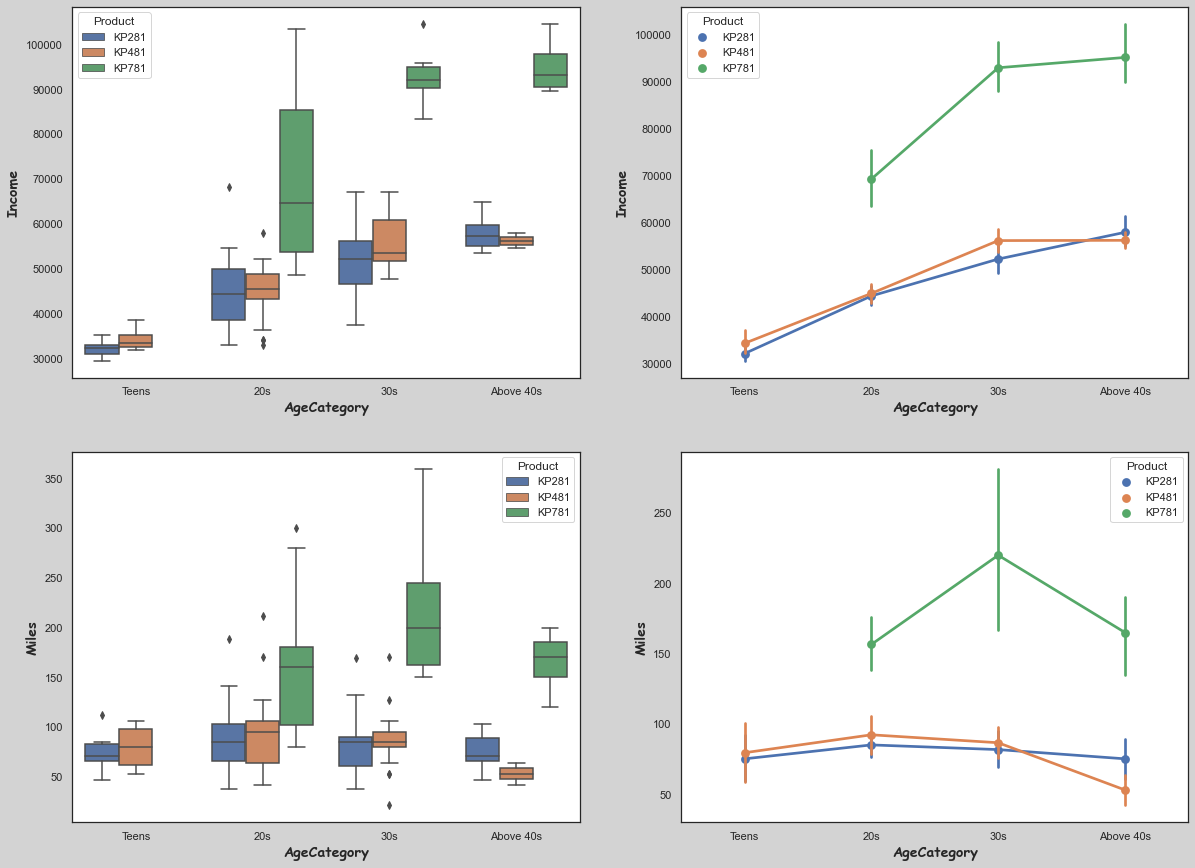

In [49]:
### Function Bi Multi variant Analysis for Numericals variables with Categrical and dependent variable¶
#Used Boxplot
#Point plot
def num_mult_analysis(df,colname,category,groupby,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:
        sns.boxplot(x = category,y = var, hue = groupby,data = df,ax=ax[rows][0])
        sns.pointplot(x=df[category],y=df[var],hue=df[groupby],ax=ax[rows][1]) 
        ax[rows][0].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS")  
        ax[rows][1].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
    plt.show()
col_num = [ 'Income', 'Miles']
num_mult_analysis(df,col_num,"AgeCategory","Product")

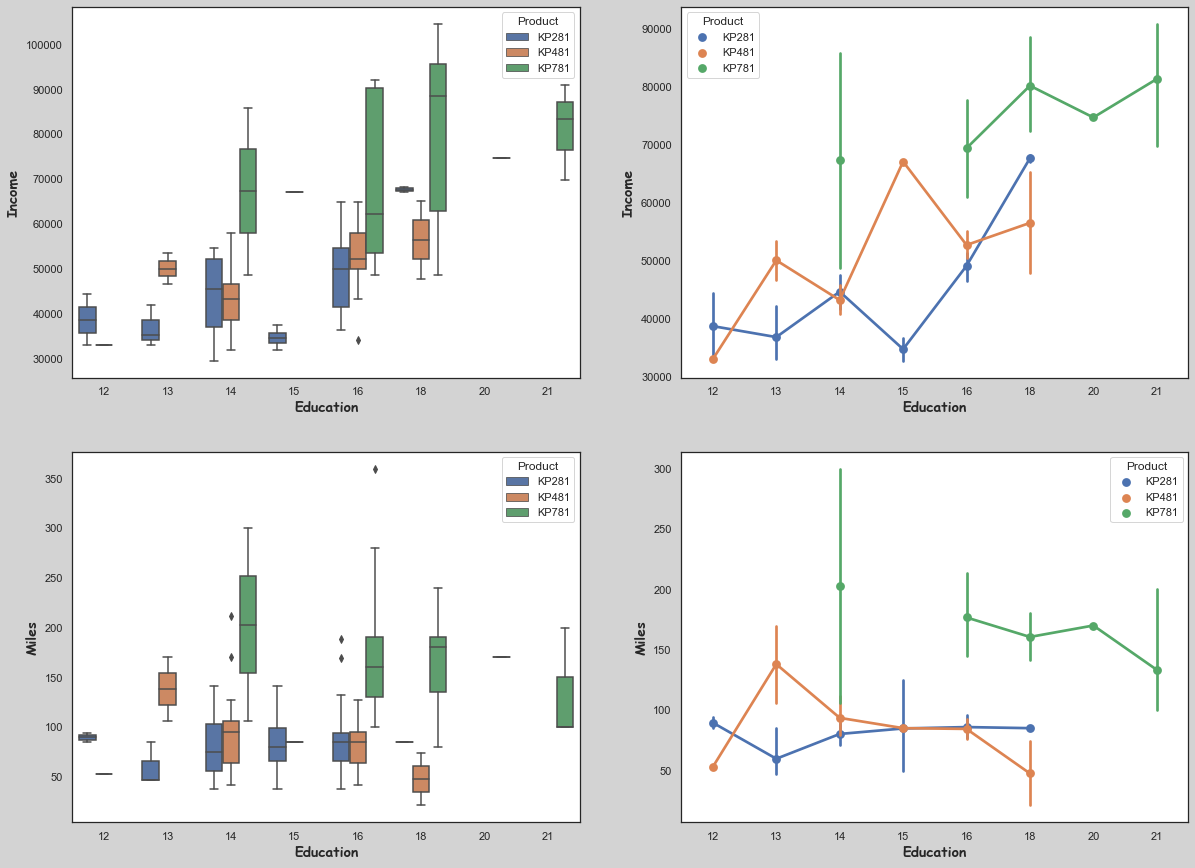

In [50]:
col_num = [ 'Income', 'Miles']
num_mult_analysis(df,col_num,"Education","Product")

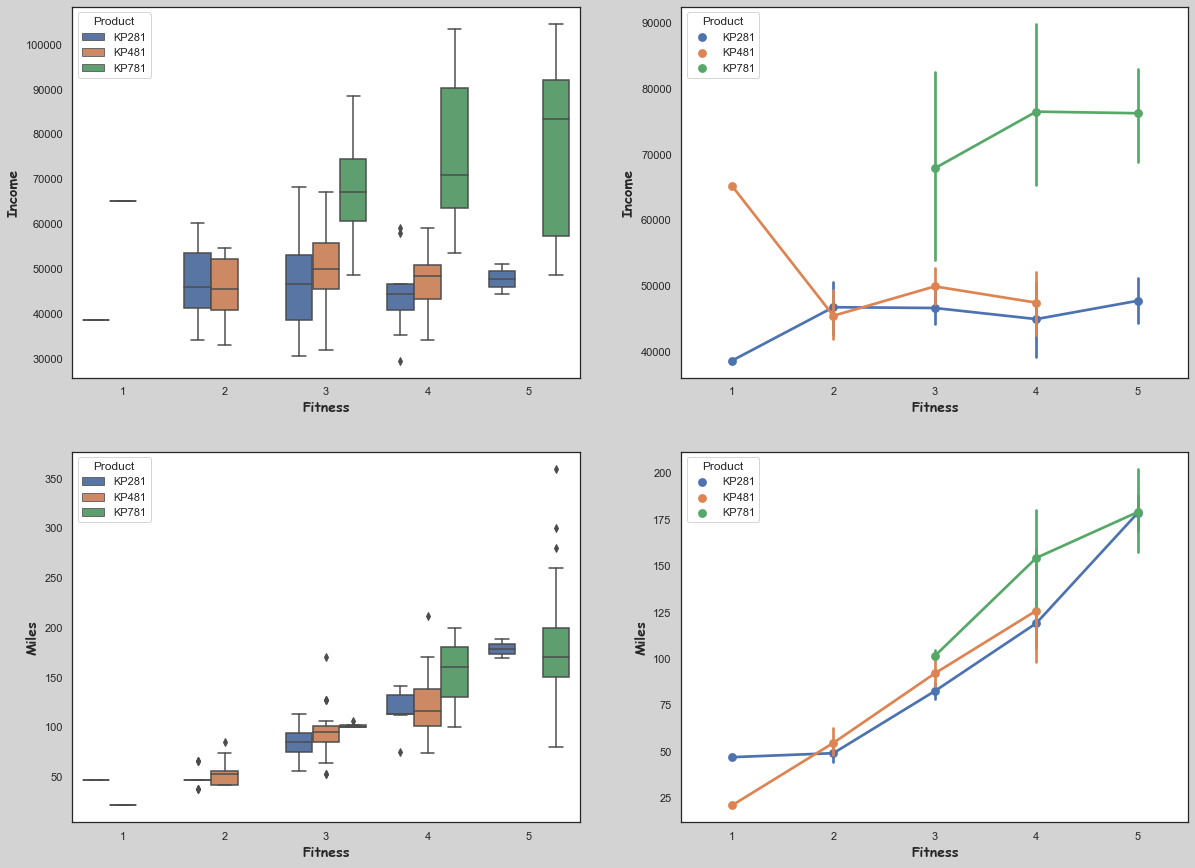

In [51]:
col_num = [ 'Income', 'Miles']
num_mult_analysis(df,col_num,"Fitness","Product")

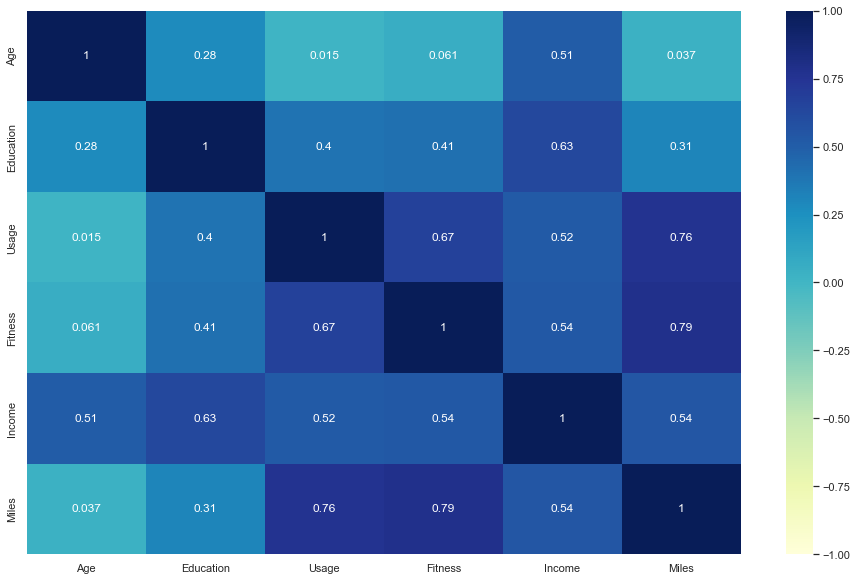

In [52]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax = 1,cmap="YlGnBu") 
plt.show()

### Inferences
1. Miles and Fitness and Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.
2. Income and education show a strong correlation. High-income and highly educated people prefer high-end models (TM798), as mentioned during Bivariant analysis of Categorical variables.
3. There is no corelation between Usage & Age or Fitness & Age which mean Age should not be barrier to use treadmills or specific model of treadmills.

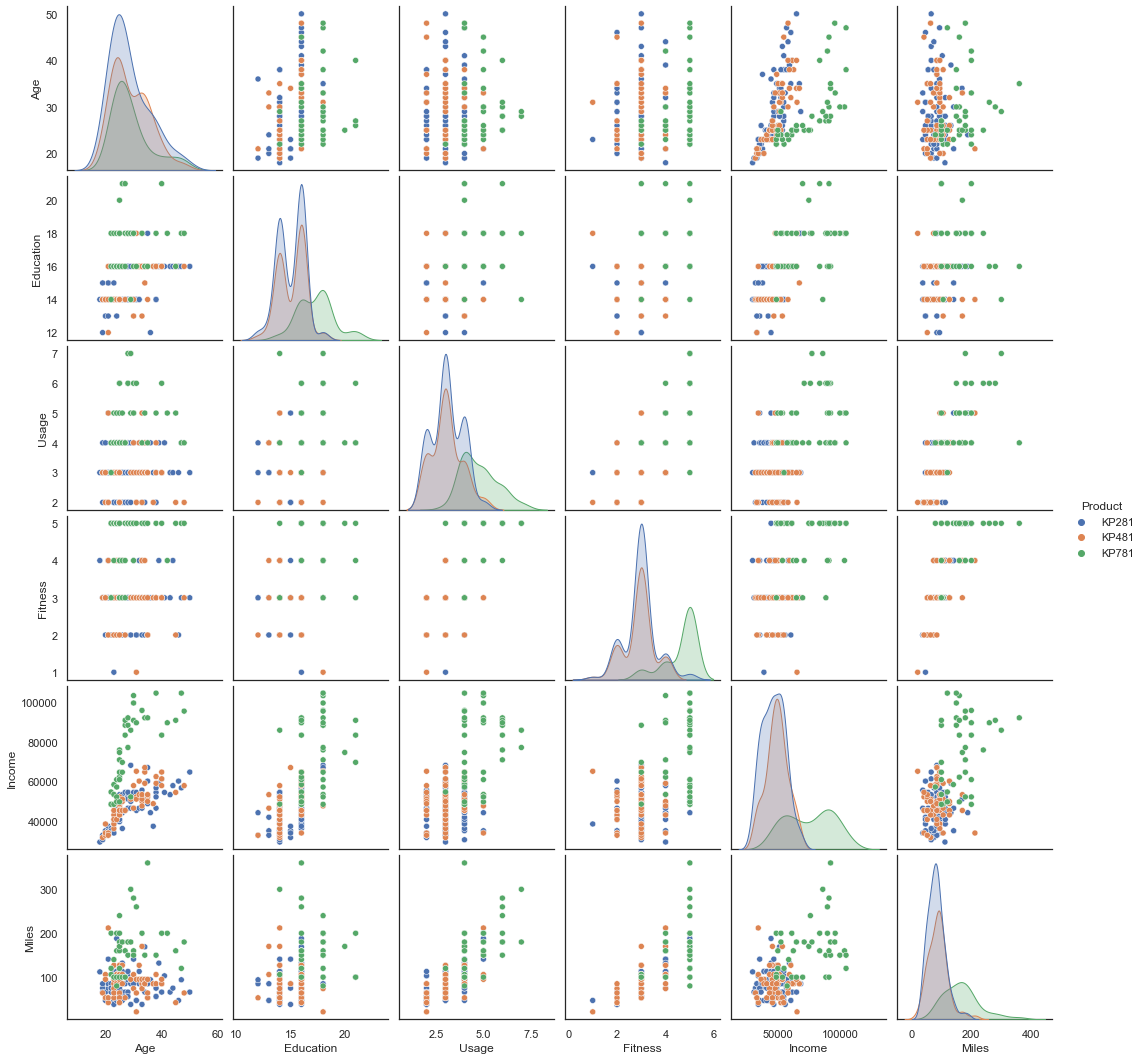

In [53]:
sns.pairplot(df, hue='Product')
plt.show()

### Analysis using Contingency Tables to Calculate Probabilities¶
# (Marginal Probabilities, Joint Probabilities, Conditional Probabilities)
## Product - Incomeslab
## Product - Gender
## Product - Fitness
## Product - AgeCategory
## Product - Marital Status

## Product - Incomeslab

In [57]:
pd.crosstab(index=df['Product'], columns=[df['IncomeSlab']],margins=True) 

IncomeSlab,Low Income,Lower-middle income,Upper-Middle income,High income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


### Percentage of a high-income customer purchasing a treadmill (Marginal Probability)

In [58]:
# Sum of the treadmill purchased by high income customer by total no. of customers.
round(14/180,2)*100

8.0

### Percentage of a High-income customer purchasing TM798 treadmill (Joint Probability)

In [60]:
### Percentage of customer with high-Income salary buying treadmill given that Product is TM798 (Conditional Probability)
round(17/17,2)*100

100.0

### Inference
1. Customers having salary more than USD dollar 85,000 buys only TM798 (high-end Model).

### Product - Gender

In [62]:
pd.crosstab(index=df['Product'], columns=[df['Gender']],margins=True) 

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


### Percentage of a Male customer purchasing a treadmill

In [63]:
prob = round((104/180),2)
pct = round(prob*100,2)
pct

58.0

In [64]:
### Percentage of a Female customer purchasing TM798 treadmill
prob = round((7/180),2)
pct = round(prob*100,2)
pct

4.0

### Percentage of Female customer buying treadmill given that Product is TM195
1. P(A|B) = P(A,B)/P(B)
2. P(Female|TM195) = P(Female,TM195)/P(TM195)

In [66]:
prob = round((40/80),2)
pct = round(prob*100,2)
pct

50.0

### Inference
1. Female customer prefer to buy TM195 & TM498
2. 50% of female tend to purchase treadmill model TM195

### Product - Fitness

In [68]:
pd.crosstab(index=df['Product'], columns=[df['Fitness']],margins=True) 

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


### Percentage of a customers having fitness level5 are

In [69]:
prob = round((31/180),2)
pct = round(prob*100,2)
pct

17.0

### Percentage of a customer with Fitness Level 5 purchasing TM798 treadmill

In [70]:
prob = round((29/180),2)
pct = round(prob*100,2)
pct

16.0

### Percentage of customer with fitness level-5 buying TM798 treadmill given that Product is TM798

In [71]:
prob = round((29/31),2)
pct = round(prob*100,2)
pct

94.0

### Inference
1. 94% of customers with fitness level 5, purchased TM798

### Product - AgeCategory

In [72]:
pd.crosstab(index=df['Product'], columns=[df['AgeCategory']],margins=True) 

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


### Percentage of customers with Age between 20s and 30s use treadmills

In [73]:
prob = round((110/180),2)
pct = round(prob*100,2)
pct

61.0

### Inference
1. Teen doesnot prefer to buy TM798
2. 61% of customer with Age group between 20 and 30 purchase treadmills

### Product - Marital Status


In [74]:
pd.crosstab(index=df['Product'], columns=[df['MaritalStatus']],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [75]:
prob = round((107/180),2)
pct = round(prob*100,2)
pct

59.0